In [1]:
import pandas as pd
import numpy as np

#for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# for randomized data splitting
from sklearn.model_selection import train_test_split

# to build linear regression model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
cData = pd.read_csv('auto-mpg.csv')

In [3]:
cData.shape

(398, 9)

In [4]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
cData = cData.drop(['car name'], axis=1)

In [7]:
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
cData['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())

In [10]:
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [11]:
cData = cData.replace('?',np.nan)

In [12]:
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [13]:
cData.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [14]:
medianfiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianfiller, axis=0)

In [15]:
cData['horsepower'] = cData['horsepower'].astype(float)

In [16]:
cData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
cData['origin']=cData['origin'].replace({1:'america', 2:'europe',3: 'asia'})

In [18]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


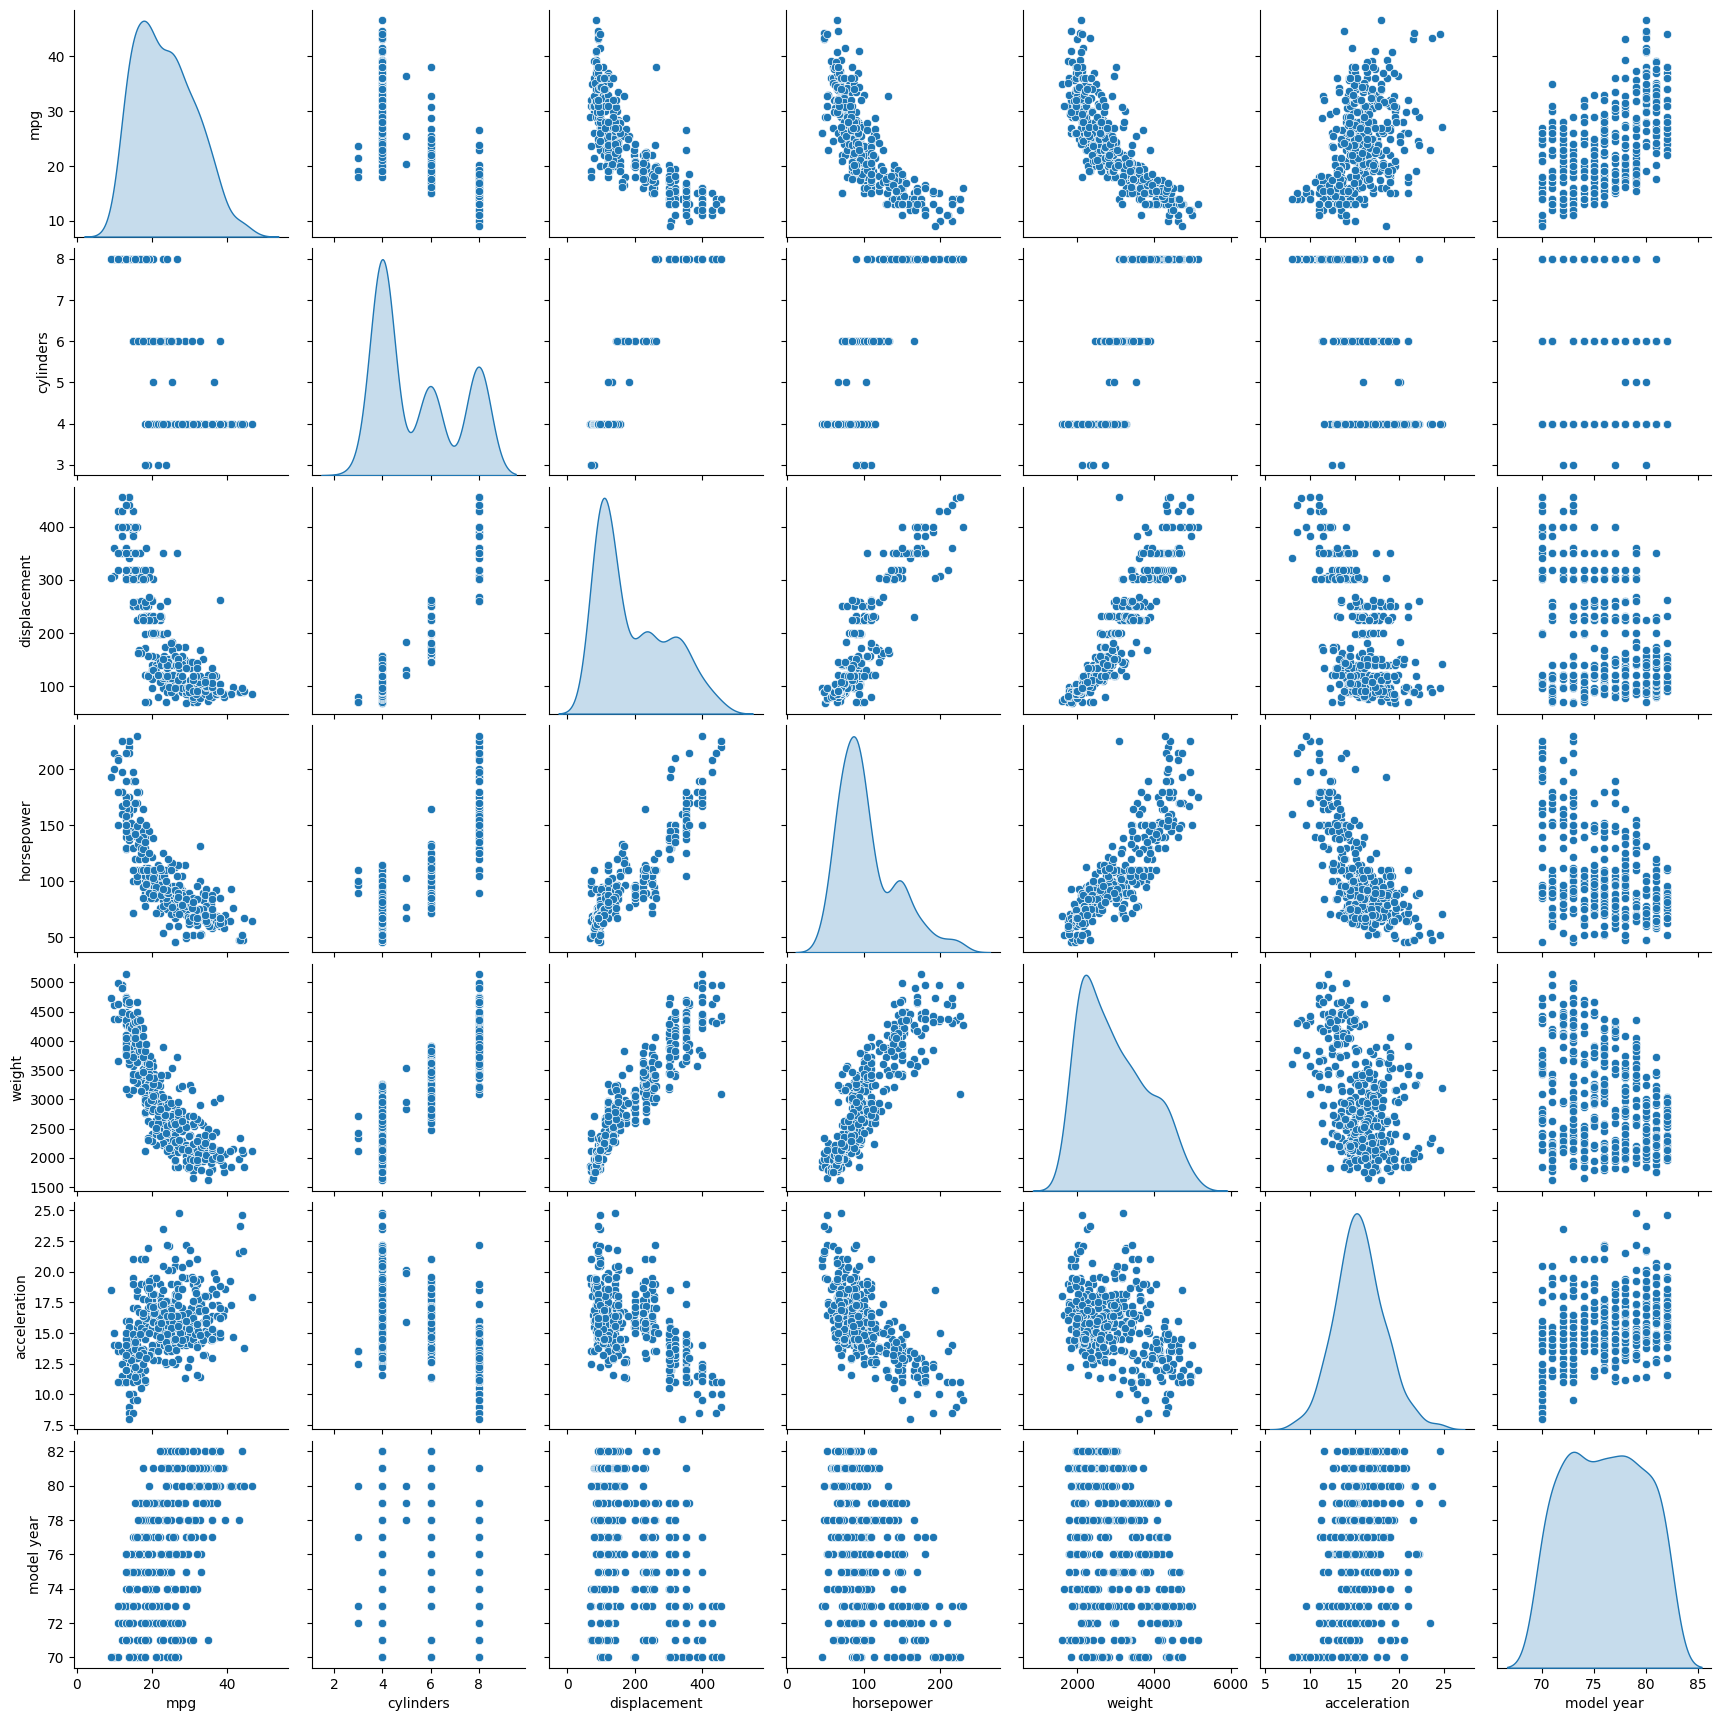

In [19]:
# use all columns except the origin column
cData_attr = cData.iloc[:,0:7]
# to plot density curve instead of histogram on the diag
sns.pairplot(data = cData_attr, diag_kind='kde')

In [20]:
cData_attr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [21]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})

In [22]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [23]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [24]:
cData = pd.get_dummies(cData, columns=['origin'], drop_first=True)
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [25]:
#think formaula is y = ax + b
# x is the independent variables
x = cData.drop(['mpg'], axis=1)
# y is the dependent variable
y = cData['mpg']

In [26]:
# add in the intercept to data
x = sm.add_constant(x)

In [27]:
x

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,1.0,8,307.0,130.0,3504,12.0,70,0,0
1,1.0,8,350.0,165.0,3693,11.5,70,0,0
2,1.0,8,318.0,150.0,3436,11.0,70,0,0
3,1.0,8,304.0,150.0,3433,12.0,70,0,0
4,1.0,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
393,1.0,4,140.0,86.0,2790,15.6,82,0,0
394,1.0,4,97.0,52.0,2130,24.6,82,0,1
395,1.0,4,135.0,84.0,2295,11.6,82,0,0
396,1.0,4,120.0,79.0,2625,18.6,82,0,0


In [28]:
# this simply splits the x and y datafranes into buckets 70% train and 30% test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [29]:
print(x_train.head())

     const  cylinders  displacement  horsepower  weight  acceleration  \
350    1.0          4         105.0        63.0    2215          14.9   
59     1.0          4          97.0        54.0    2254          23.5   
120    1.0          4         121.0       112.0    2868          15.5   
12     1.0          8         400.0       150.0    3761           9.5   
349    1.0          4          91.0        68.0    1985          16.0   

     model year  origin_asia  origin_europe  
350          81            0              0  
59           72            0              1  
120          73            0              1  
12           70            0              0  
349          81            1              0  


In [30]:
x_train.shape

(278, 9)

In [31]:
x_test.shape

(120, 9)

In [32]:
cData.shape

(398, 9)

In [33]:
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()

In [34]:
type(olsres)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [35]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.20e-93
Time:                        13:02:23   Log-Likelihood:                -734.21
No. Observations:                 278   AIC:                             1486.
Df Residuals:                     269   BIC:                             1519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.2847      5.679     -3.748

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns)
print("VIF values: \n\n{}\n".format(vif_series1))


VIF values: 

const            752.897742
cylinders         11.692490
displacement      24.771073
horsepower         8.798447
weight            11.820934
acceleration       2.507584
model year         1.287721
origin_asia        1.732001
origin_europe      1.654078
dtype: float64



In [37]:
x_train2 = x_train.drop(['displacement'], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
      'R-squared:',
      np.round(olsres_1.rsquared, 3),
      '\nAdjusted R-squared:',
      np.round(olsres_1.rsquared_adj, 3),)

R-squared: 0.808 
Adjusted R-squared: 0.803


In [40]:
x_train3 = x_train.drop(['weight'], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(
      'R-squared:',
      np.round(olsres_2.rsquared, 3),
      '\nAdjusted R-squared:',
      np.round(olsres_2.rsquared_adj, 3),)

R-squared: 0.761 
Adjusted R-squared: 0.755


In [44]:
x_train4 = x_train.drop(['cylinders'], axis=1)
olsmod_3 = sm.OLS(y_train, x_train4)
olsres_3 = olsmod_3.fit()
print(
      'R-squared:',
      np.round(olsres_3.rsquared, 3),
      '\nAdjusted R-squared:',
      np.round(olsres_3.rsquared_adj, 3),)


R-squared: 0.814 
Adjusted R-squared: 0.809


In [45]:
x_train5 = x_train.drop(["horsepower"], axis=1)
olsmod_4 = sm.OLS(y_train, x_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.813 
Adjusted R-squared: 0.808


In [47]:
x_train = x_train.drop(['cylinders'], axis=1)

In [49]:
olsmod_5 = sm.OLS(y_train, x_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     168.2
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.37e-94
Time:                        13:37:25   Log-Likelihood:                -734.66
No. Observations:                 278   AIC:                             1485.
Df Residuals:                     270   BIC:                             1514.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -22.1879      5.594     -3.966

In [50]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,)
print('VIF values: \n\n{}\n'.format(vif_series2))

VIF values: 

const            731.003943
displacement      13.248599
horsepower         8.796783
weight            11.820508
acceleration       2.501131
model year         1.286863
origin_asia        1.696541
origin_europe      1.645867
dtype: float64



In [51]:
x_train6 = x_train.drop(["displacement"], axis=1)
olsmod_6 = sm.OLS(y_train, x_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.807 
Adjusted R-squared: 0.803


In [52]:
x_train7 = x_train.drop(["horsepower"], axis=1)
olsmod_7 = sm.OLS(y_train, x_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.812 
Adjusted R-squared: 0.808


In [53]:
x_train = x_train.drop(['horsepower'], axis=1)

In [54]:
olsmod_8 = sm.OLS(y_train, x_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     195.4
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.30e-95
Time:                        13:47:37   Log-Likelihood:                -735.58
No. Observations:                 278   AIC:                             1485.
Df Residuals:                     271   BIC:                             1511.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -25.0108      5.192     -4.817

In [56]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,)
print('VIF values: \n\n{}\n'.format(vif_series3))

VIF values: 

const            627.855162
displacement      12.752086
weight             9.168726
acceleration       1.608205
model year         1.251558
origin_asia        1.632818
origin_europe      1.618991
dtype: float64



In [57]:
x_train = x_train.drop(['displacement'],axis=1)

In [58]:
vif_series4 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,)
print('VIF values: \n\n{}\n'.format(vif_series4))

VIF values: 

const            578.336128
weight             1.875617
acceleration       1.270708
model year         1.163827
origin_asia        1.485056
origin_europe      1.371190
dtype: float64



In [59]:
oldmod_9 = sm.OLS(y_train, x_train)
oldres_9 = oldmod_9.fit()
print(oldres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     227.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           7.71e-95
Time:                        14:10:36   Log-Likelihood:                -739.67
No. Observations:                 278   AIC:                             1491.
Df Residuals:                     272   BIC:                             1513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.8630      5.048     -4.133

In [60]:
x_train = x_train.drop(['acceleration'], axis=1)

In [61]:
x_train8 = x_train

In [67]:
olsmod_10 = sm.OLS(y_train, x_train8)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     284.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           4.52e-96
Time:                        14:36:50   Log-Likelihood:                -739.73
No. Observations:                 278   AIC:                             1489.
Df Residuals:                     273   BIC:                             1508.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.5889      4.968     -4.144

In [68]:
df_pred = pd.DataFrame()
df_pred['Actual Values'] = y_train.values.flatten()
df_pred['Fitted Values'] = olsres_10.fittedvalues.values
df_pred['Residuals']=olsres_10.resid.values
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,34.7,31.561419,3.138581
1,23.0,26.114223,-3.114223
2,19.0,23.217684,-4.217684
3,15.0,13.334099,1.665901
4,34.1,34.484220,-0.384220


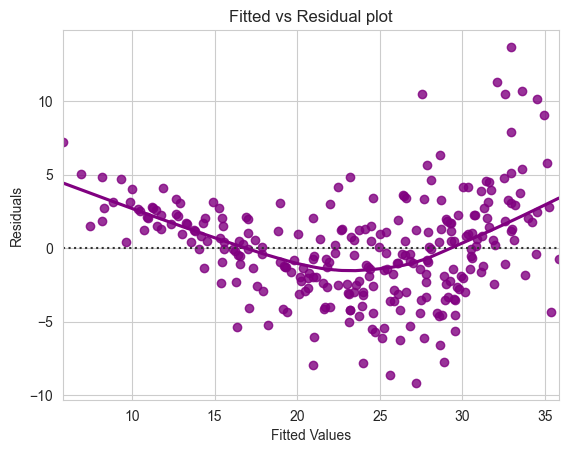

In [69]:
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred, x='Fitted Values', y='Residuals', color='purple', lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [70]:
x_train8.columns

Index(['const', 'weight', 'model year', 'origin_asia', 'origin_europe'], dtype='object')

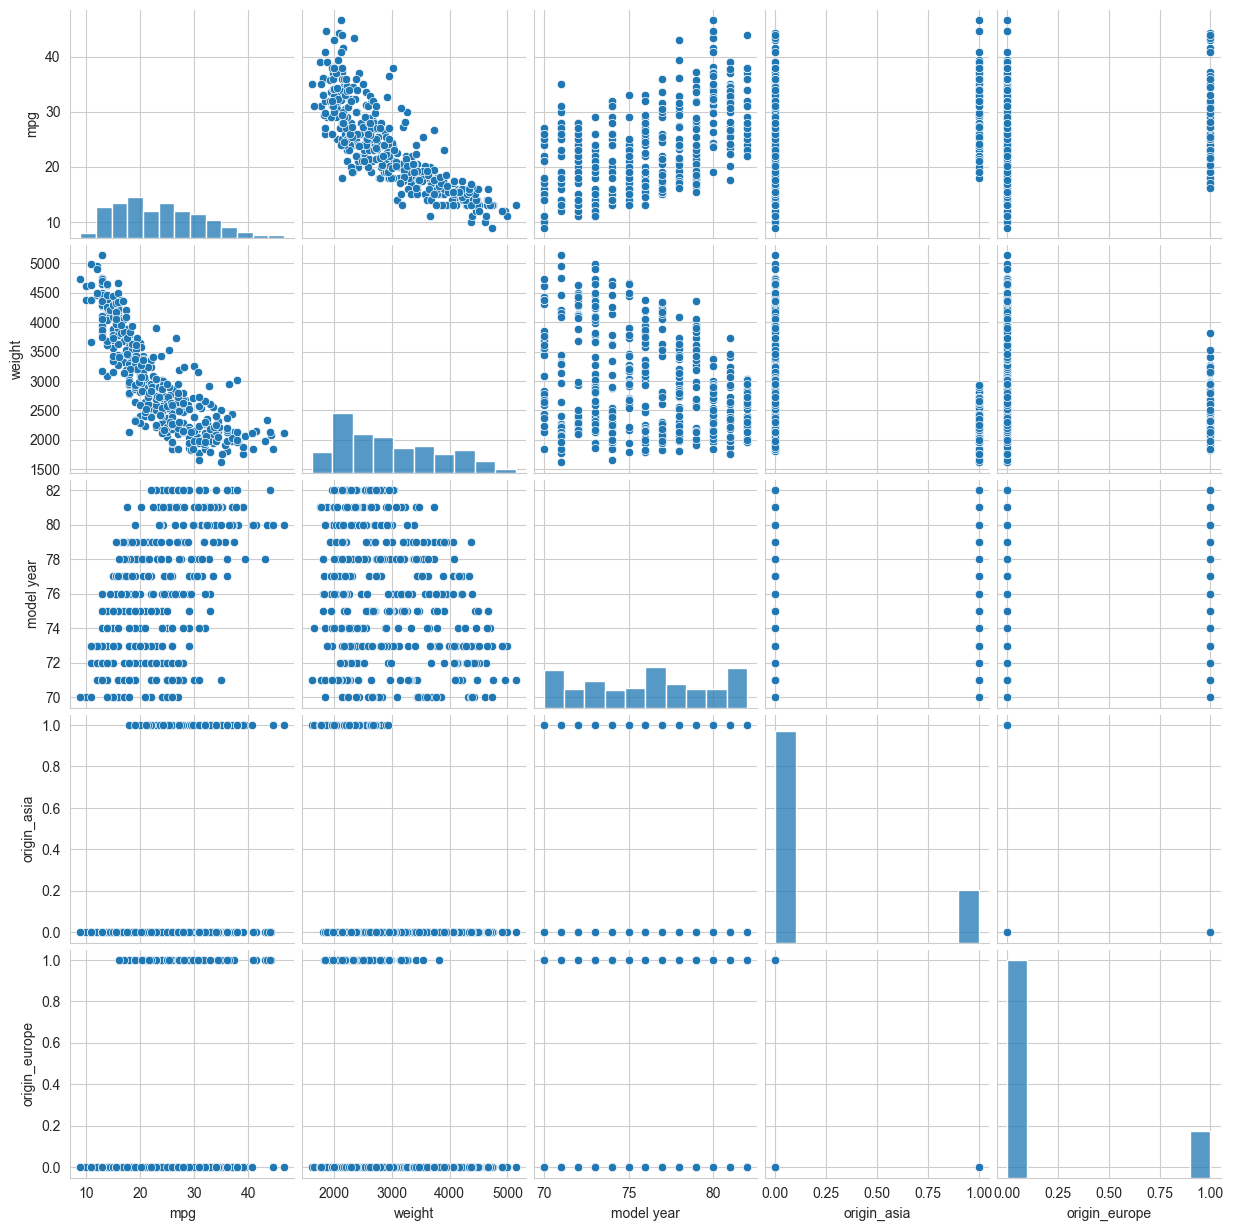

In [71]:
sns.pairplot(cData[['mpg','weight','model year','origin_asia','origin_europe']])
plt.show()

In [72]:
x_train8['weight_sq'] = np.square(x_train8['weight'])

In [73]:
olsmod_11 = sm.OLS(y_train, x_train8)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     312.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.89e-110
Time:                        14:44:53   Log-Likelihood:                -702.85
No. Observations:                 278   AIC:                             1418.
Df Residuals:                     272   BIC:                             1439.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2450      4.803     -0.467

In [74]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_11.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_11.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,34.7,33.025269,1.674731
1,23.0,25.901375,-2.901375
2,19.0,21.003846,-2.003846
3,15.0,11.931984,3.068016
4,34.1,35.904840,-1.804840


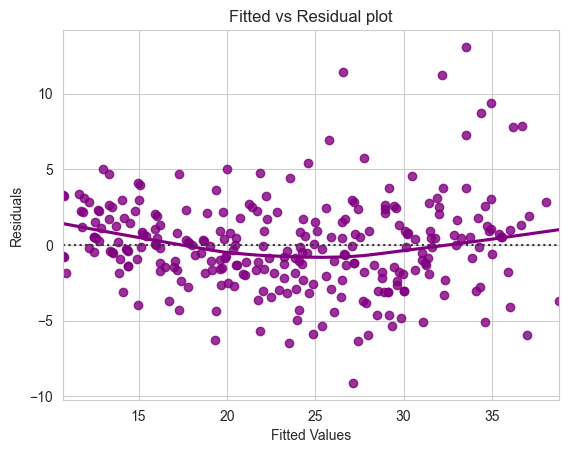

In [75]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

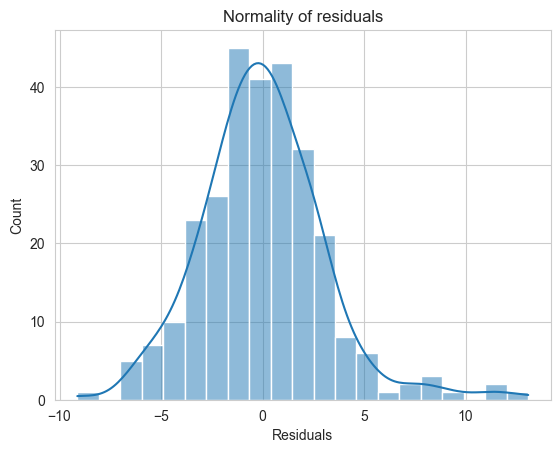

In [76]:
sns.histplot(df_pred['Residuals'], kde=True)
plt.title('Normality of residuals')
plt.show()

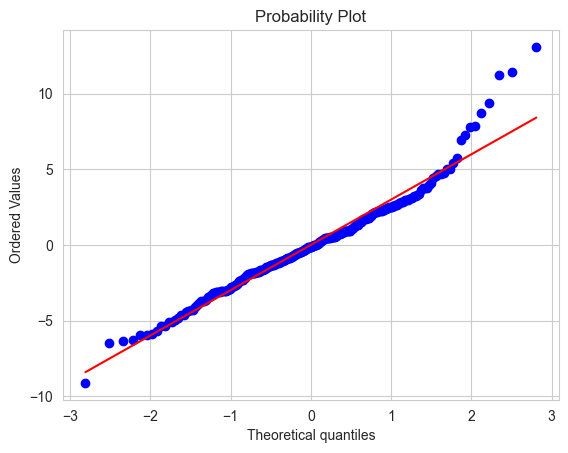

In [77]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred['Residuals'],dist='norm', plot=pylab)
plt.show()

In [78]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9622615575790405, pvalue=1.1951609621974058e-06)

In [80]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [81]:
name = ['F statistic','p-value']
    test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train8)
lzip(name, test)

[('F statistic', 0.8728487945403866), ('p-value', 0.7830103059970799)]

In [83]:
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     312.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.89e-110
Time:                        16:38:46   Log-Likelihood:                -702.85
No. Observations:                 278   AIC:                             1418.
Df Residuals:                     272   BIC:                             1439.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2450      4.803     -0.467

In [85]:
olsres_11.params

const           -2.244962
weight          -0.022121
model year       0.890230
origin_asia      0.185926
origin_europe    1.318924
weight_sq        0.000002
dtype: float64

In [87]:
# Let us write the equation of linear regression
Equation = "mpg ="
print(Equation, end=" ")
for i in range(len(x_train8.columns)):
    if i == 0:
        print(olsres_11.params[i], "+", end=" ")
    elif i != len(x_train8.columns) - 1:
        print(
            olsres_11.params[i],
            "* (",
            x_train8.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_11.params[i], "* (", x_train8.columns[i], ")")

mpg = -2.2449619332830046 + -0.022121230258630734 * ( weight ) +  0.8902301552066111 * ( model year ) +  0.18592647767129478 * ( origin_asia ) +  1.3189237652394512 * ( origin_europe ) +  2.4785070327742323e-06 * ( weight_sq )


In [89]:
x_train8.columns

Index(['const', 'weight', 'model year', 'origin_asia', 'origin_europe',
       'weight_sq'],
      dtype='object')

In [90]:
x_test.columns

Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_asia', 'origin_europe'],
      dtype='object')

In [92]:
x_test2 = x_test.drop(
    ["cylinders", "displacement", "horsepower", "acceleration"], axis=1
)

In [93]:
x_test2['weight_sq'] = np.square(x_test2['weight'])

In [95]:
y_pred = olsres_11.predict(x_test2)

In [97]:
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred['Fitted Values']))
rmse1

3.032281897495672

In [98]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

2.8838359017722204

In [99]:
mae1 = mean_absolute_error(y_train, df_pred['Fitted Values'])
mae1

2.2445898017599393

In [100]:
mae2 = mean_absolute_error(y_test, y_pred)
mae2

2.2035186878326596